<a href="https://colab.research.google.com/github/aditi150804/summer-of-code-2024/blob/main/frauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/onlinefraud.csv'

In [ ]:
import pandas as pd
df = pd.read_csv(file_path)
print(df.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None


In [ ]:
print(df.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print(df.duplicated().sum())


0


In [ ]:

df_encode = pd.get_dummies(df,columns = ["type"])
drop = ["nameOrig","nameDest"]
df_encode = df_encode.drop(columns = drop)
df_encode = df_encode.astype(int)
print(df_encode.head())


   step  amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0     1    9839         170136          160296               0   
1     1    1864          21249           19384               0   
2     1     181            181               0               0   
3     1     181            181               0           21182   
4     1   11668          41554           29885               0   

   newbalanceDest  isFraud  isFlaggedFraud  type_CASH_IN  type_CASH_OUT  \
0               0        0               0             0              0   
1               0        0               0             0              0   
2               0        1               0             0              0   
3               0        1               0             0              1   
4               0        0               0             0              0   

   type_DEBIT  type_PAYMENT  type_TRANSFER  
0           0             1              0  
1           0             1              0  
2           0    

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [ ]:
features = ["step","amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest","type_CASH_IN","type_CASH_OUT","type_DEBIT","type_PAYMENT","type_TRANSFER"]
target = ["isFraud"]
X = df_encode[features].values
y = df_encode[target].values
X = X.reshape(X.shape[0],X.shape[1])
y = y.reshape(y.shape[0],y.shape[1])
print(y)
print(X.shape)
print(y.shape)

[[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]
(6362620, 11)
(6362620, 1)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(np.isnan(X_train).any(), np.isnan(y_train).any())
print(np.isinf(X_train).any(), np.isinf(y_train).any())


False False
False False


In [ ]:
print(df.describe())
print(np.isnan(X_train).any(), np.isnan(y_train).any())
print(np.isinf(X_train).any(), np.isinf(y_train).any())


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


Used SMOTE to tackle class imbalance as accuracy was low, but no difference observed.

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='sigmoid'))


Experimenting with different activation functions and layers depth, no. of nodes etc to improve low accuracy

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)



using sigmoid activation over softmax greatly improved the accuracy

In [ ]:
history = model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.2,callbacks=[early_stopping])


Epoch 1/2
127253/127253 [==============================] - 501s 4ms/step - loss: 0.0039 - accuracy: 0.9993 - val_loss: 0.0032 - val_accuracy: 0.9994
Epoch 2/2
127253/127253 [==============================] - 530s 4ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 0.0027 - val_accuracy: 0.9995


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.4f}')


39767/39767 [==============================] - 89s 2ms/step - loss: 0.0025 - accuracy: 0.9995
Test Accuracy: 0.9995


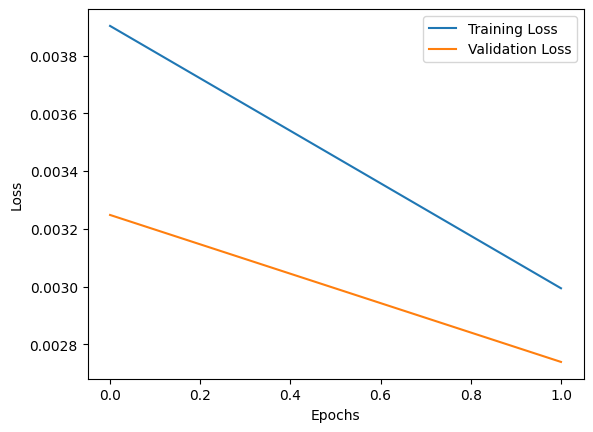

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()